In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data dir

data_dir = 'D:/thon/project/tourism/2022년/카드데이터'

# data load

card = pd.read_csv(data_dir + '/card_sports.csv') # load하는데 10초 소요
card = card.drop(['Unnamed: 0'], axis = 1)
card['ta_ym'] = pd.to_datetime(card['ta_ym'], format='%Y%m')

In [3]:
card.head()

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,스포츠활동,레저스포츠,F,20,2021-11-01,WHITE,휴식,2721300,119
1,울산,울산,남구,스포츠활동,헬스,M,30,2022-03-01,WHITE,휴식,94882900,588
2,대전,대전,동구,스포츠활동,레저스포츠,M,60,2021-11-01,WHITE,활동,798800,57
3,광주,광주,북구,스포츠활동,레저스포츠,M,30,2021-09-01,RED,휴식,5021600,193
4,광주,광주,북구,스포츠활동,스포츠용품구매,F,60,2021-08-01,WHITE,활동,69405000,789


In [22]:
card['year'] = pd.DatetimeIndex(card['ta_ym']).year
card['month'] = pd.DatetimeIndex(card['ta_ym']).month

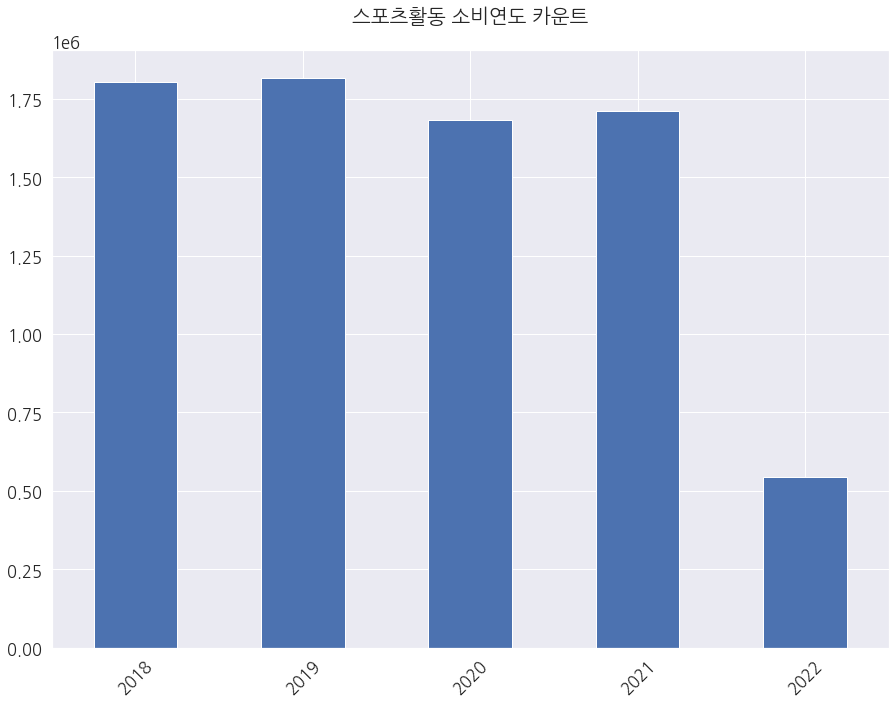

In [93]:
# 스포츠참여활동 시각화
sports_year = card['year'].value_counts().sort_index()

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (15, 11))
ax = sports_year.plot(kind = 'bar')
plt.xticks(rotation = 45)
ax.set_title('스포츠활동 소비연도 카운트\n', fontsize = 20)
ax.set_xlabel('');  # semicolon suppresses text output

In [48]:
card['gb2'].value_counts()

스포츠용품구매    2212682
레저스포츠      2004022
골프         1748008
헬스         1220027
자전거         335595
스키           37411
운동경기관람        3114
Name: gb2, dtype: int64

In [55]:
# 미추홀 689건: SK 문학야구장, 대구 수성구 494건: 삼성라이온즈파크, 창원시 244건: 창원 NC 파크, 수원시 107건: kt 위즈파크, 중구 88건: 한화 이글스파크
# 롯데 사직구장 (부산 동래구), 기아 챔피언스필드 (광주 북구), LG/두산 잠실야구장(송파구)는 왜 없을까??

card.loc[card['gb2'] == '운동경기관람']['v3'].value_counts()

미추홀구    689
강릉시     583
수성구     494
무주군     485
창원시     244
경주시     125
파주시     111
수원시     107
중구       88
고양시      56
성남시      35
광양시      30
양평군      23
양주시      16
영천시      14
화성시       6
유성구       4
송파구       3
논산시       1
Name: v3, dtype: int64

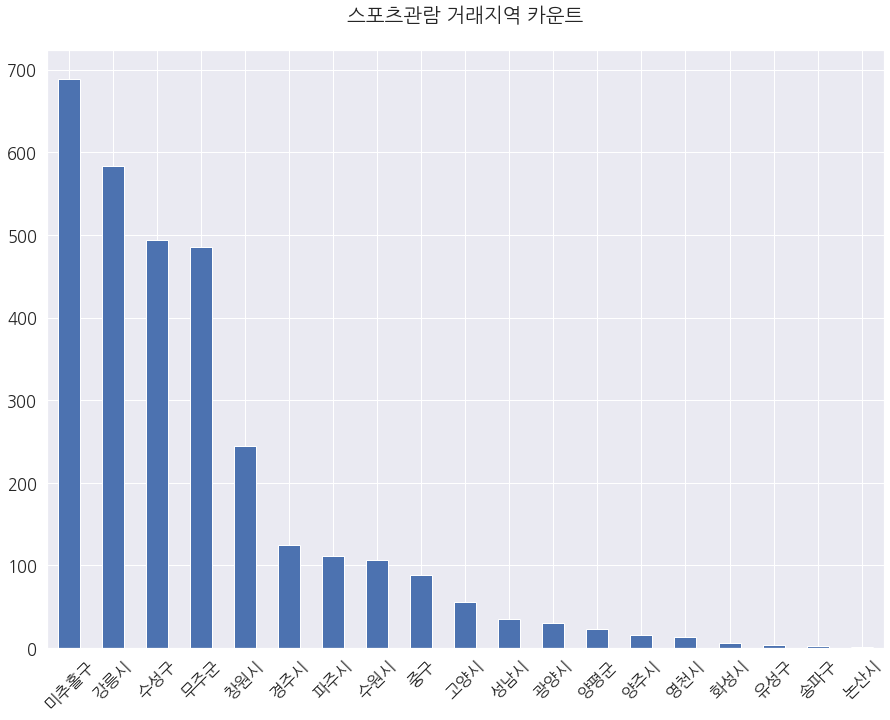

In [94]:
# 스포츠참여활동 시각화
sports_watch_region = card.loc[card['gb2'] == '운동경기관람']['v3'].value_counts()
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (15, 11))
ax = sports_watch_region.plot(kind = 'bar')
plt.xticks(rotation = 45)
ax.set_title('스포츠관람 거래지역 카운트\n', fontsize = 20)
ax.set_xlabel('');  # semicolon suppresses text output

In [73]:
# 대전 중구 맞는지 확인

card.loc[(card['v3'] == '중구')&(card['gb2'] == '운동경기관람')]['v2'].value_counts()

대전    88
Name: v2, dtype: int64

### 미추홀 689건: SK 문학야구장, 대구 수성구 494건: 삼성라이온즈파크, 창원시 244건: 창원 NC 파크, 수원시 107건: kt 위즈파크, 중구 88건: 한화 이글스파크
### 제일 인기 많은 세 구장 롯데 사직구장 (부산 동래구), 기아 챔피언스필드 (광주 북구), LG/두산 잠실야구장(송파구)는 왜 없을까??
### 롯데 구장은 롯데카드랑 제휴하고 신한카드 제휴 없음, 기아는 현대카드, 광주카드랑 제휴, LG는 신한카드랑 제휴했는데 왜??
### 제휴카드랑은 상관이 없는듯하다.

In [70]:
# 무주군은 겨울스포츠 뭔가 하나봄

card.loc[(card['gb2'] == '운동경기관람')&(card['v3'] == '무주군')]['month'].value_counts(sort = False)

12    119
1     226
2     115
8      18
7       3
10      1
3       1
5       2
Name: month, dtype: int64

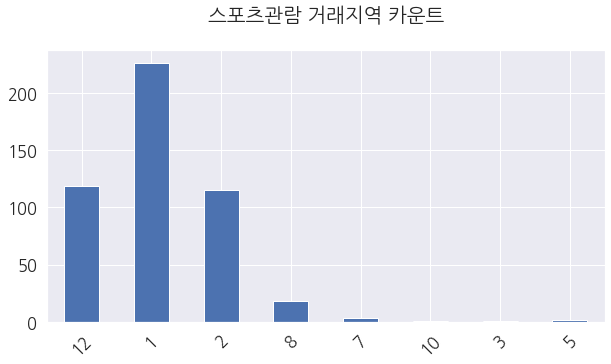

In [119]:
# 무주군 스포츠 관람 시각화
muju = card.loc[(card['gb2'] == '운동경기관람')&(card['v3'] == '무주군')]['month'].value_counts(sort = False)
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (10, 5))
ax = muju.plot(kind = 'bar')
plt.xticks(rotation = 45)
ax.set_title('스포츠관람 거래지역 카운트\n', fontsize = 20)
ax.set_xlabel('');  # semicolon suppresses text output

In [78]:
# 강릉시에는 강원 FC의 강릉종합축구장이 있고, 케이리그 시즌이 3~ 12월까지라고 하니 그럴싸하다
# 2020년 케이리그 비대면도 했으니..
print(card.loc[(card['gb2'] == '운동경기관람')&(card['v3'] == '강릉시')]['month'].value_counts())
print(card.loc[(card['gb2'] == '운동경기관람')&(card['v3'] == '강릉시')][['year', 'month']].value_counts(sort = False))

4     92
5     84
7     74
8     71
9     71
3     69
10    44
11    29
12    23
6     18
2      8
Name: month, dtype: int64
year  month
2018  2         1
      3        25
      4        41
      5        20
      7        36
      8        21
      9        32
      10       12
      11       17
      12       10
2019  3        13
      4        19
      5        33
      6        18
      7        29
      8        30
      9        29
      10        8
      11        9
2020  8         5
      10       13
2021  3        12
      4        18
      5        31
      7         9
      8        15
      9        10
      10       11
      11        3
      12       13
2022  2         7
      3        19
      4        14
dtype: int64


In [72]:
# 경주에는 무슨 스포츠를 관람하는건지 모르겠지만 비교적 고르게 분포 
card.loc[(card['gb2'] == '운동경기관람')&(card['v3'] == '경주시')]['month'].value_counts()

10    16
2     13
4     13
3     12
12    11
11    11
7     10
5     10
9      9
6      8
8      8
1      4
Name: month, dtype: int64

In [120]:
# 미추홀구는 그냥 야구 보는 거 치고는 금액이 좀 비쌈

print('미추홀구 스포츠관람 거래의 취급액 중앙값:', round(card.loc[(card['gb2'] == '운동경기관람')&(card['v3'] == '미추홀구')]['vlm'].median()))
print('대구 수성구 스포츠관람 거래의 취급액 중앙값:', round(card.loc[(card['gb2'] == '운동경기관람')&(card['v3'] == '수성구')]['vlm'].median()))
print('창원시 스포츠관람 거래의 취급액 중앙값:', round(card.loc[(card['gb2'] == '운동경기관람')&(card['v3'] == '창원시')]['vlm'].median()))

미추홀구 스포츠관람 거래의 취급액 중앙값: 375440
대구 수성구 스포츠관람 거래의 취급액 중앙값: 50700
창원시 스포츠관람 거래의 취급액 중앙값: 192280


In [124]:
card.loc[card['gb2'] == '골프']['cln_age_r'].value_counts().sort_index()

20    181654
30    349210
40    475080
50    463205
60    278859
Name: cln_age_r, dtype: int64